# Data exploration




In [1]:
# Import
import pandas as pd
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
# Colorcodes for the graphs
colors = ["#7dc491","#7dc4be","#7d91c4","#8b7dc4","#a57dc4", "#6d0f70"]

In [ ]:
# Categories
flemish_provinces = ['WEST-VLAANDEREN', 'OOST-VLAANDEREN', 'VLAAMS-BRABANT', 'ANTWERPEN', 'LIMBURG', 'OTHER']
age_cat = ['under 19', '20 to 29', '30 to 39', '40 to 49', '50 to 59', '60 and above']
education=['none', 'high school', 'associate degree (HBO5)', 'professional bachelor', 'bachelor-after-bachelor', 'academic bachelor', 'master', 'master-after-master', 'doctorate']

## Import data

In [ ]:
# Read excel file with demographics
df_annotators = pd.read_excel("../Data/annotators.xlsx")
df_annotators

,Annotator_id,Tweets_total,Tweets_correct,Acc,Gender,Flemish_Provinces,Age,Age_cat,Age_cat_two,Education,Education_cat
0,1,100,76,0.76,female,VLAAMS-BRABANT,22,20 to 29,below 23,academic bachelor,university
1,2,100,49,0.49,male,VLAAMS-BRABANT,21,20 to 29,below 23,high school,no university
2,3,100,81,0.81,male,VLAAMS-BRABANT,23,20 to 29,below 23,academic bachelor,university
3,4,100,66,0.66,female,VLAAMS-BRABANT,22,20 to 29,below 23,academic bachelor,university
4,5,100,71,0.71,male,VLAAMS-BRABANT,24,20 to 29,above 23,master,university
...,...,...,...,...,...,...,...,...,...,...,...
90,91,100,80,0.80,male,VLAAMS-BRABANT,25,20 to 29,above 23,master,university
91,92,100,77,0.77,female,WEST-VLAANDEREN,22,20 to 29,below 23,high school,no university
92,93,100,81,0.81,female,WEST-VLAANDEREN,35,30 to 39,above 23,associate degree (HBO5),no university
93,94,100,72,0.72,female,WEST-VLAANDEREN,36,30 to 39,above 23,professional bachelor,no university


In [ ]:
# Read excel file with annotations
df_annotations = pd.read_excel("../Data/annotations.xlsx")


In [ ]:
# merge annotations with demographics
df_annotations_demographics = df_annotations.merge(df_annotators, on='Annotator_id')

In [ ]:
# merge annotations with iaa
tweets = pd.read_excel("../Data/tweets.xlsx")
df_annotations_demographics = df_annotations_demographics.merge(tweets[['Tweet_id', 'iaa', 'GR']], how='right', on='Tweet_id')
df_annotations_demographics

,Sentiment,text_clean,Tweet_id,Annotator_id,Tweets_total,Tweets_correct,Acc,Gender,Flemish_Provinces,Age,Age_cat,Age_cat_two,Education,Education_cat,iaa,GR
0,neutral,ik heb 13u aan een stuk gewerkt come at me,1,67,300,252,0.840000,male,VLAAMS-BRABANT,30,30 to 39,above 23,doctorate,university,0.579270,neutral
1,neutral,ik heb 13u aan een stuk gewerkt come at me,1,82,1100,864,0.785455,female,OOST-VLAANDEREN,22,20 to 29,below 23,professional bachelor,no university,0.579270,neutral
2,neutral,ik heb 13u aan een stuk gewerkt come at me,1,18,300,199,0.663333,male,OOST-VLAANDEREN,55,50 to 59,above 23,high school,no university,0.579270,neutral
3,neutral,ik heb 13u aan een stuk gewerkt come at me,1,64,1500,1192,0.794667,male,VLAAMS-BRABANT,23,20 to 29,below 23,master,university,0.579270,neutral
4,negative,ik heb 13u aan een stuk gewerkt come at me,1,38,300,216,0.720000,female,OOST-VLAANDEREN,56,50 to 59,above 23,associate degree (HBO5),no university,0.579270,neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,neutral,“Op weg naar huis wil ik vrij zijn en niet moe...,3000,42,400,288,0.720000,female,OOST-VLAANDEREN,23,20 to 29,below 23,professional bachelor,no university,0.333325,negative
14996,negative,“Op weg naar huis wil ik vrij zijn en niet moe...,3000,10,400,346,0.865000,female,LIMBURG,22,20 to 29,below 23,academic bachelor,university,0.333325,negative
14997,negative,“Op weg naar huis wil ik vrij zijn en niet moe...,3000,49,200,163,0.815000,male,LIMBURG,24,20 to 29,above 23,academic bachelor,university,0.333325,negative
14998,positive,“Op weg naar huis wil ik vrij zijn en niet moe...,3000,41,100,55,0.550000,female,OOST-VLAANDEREN,57,50 to 59,above 23,associate degree (HBO5),no university,0.333325,negative


## Demographics


### Explore gender

In [ ]:
print(df_annotators['Gender'].value_counts())

female    54
male      41
Name: Gender, dtype: int64


In [ ]:
# Histogram about Gender
fig = px.histogram(df_annotators['Gender'], x="Gender", text_auto=True, template="plotly_white")
fig.update_layout(
    title_text='Gender distribution', # title of plot
    xaxis_title_text='Gender', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

### Explore Age


In [ ]:
# Basic statistics
df_annotators[['Age']].describe()

,Age
count,95.000000
mean,31.873684
std,13.676538
min,19.000000
25%,22.000000
50%,24.000000
75%,42.000000
max,79.000000


In [ ]:
# Create boxplot about age
fig = px.box(df_annotators, y="Age", width=600, template="plotly_white")
fig.update_layout(
    title_text='Boxplot age', # title of plot
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
# Boxplot age + mean
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Box(
    y=df_annotators['Age'],
    name='Age',
    marker_color=colors[0],
    boxmean=True,
    width=600
))
fig.update_layout(
    title_text='Boxplot age', # title of plot
    font=dict(
        family="Helvetica",
        size=18
    ),
    width=500,
)
fig.show()

In [ ]:
# Create grouped boxplot about age grouped by gender
fig = px.box(df_annotators, y="Age", x='Gender', color_discrete_sequence=colors, width=600)
fig.update_layout(
    title_text='Boxplot age by gender', # title of plot
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()


In [ ]:
# Histogram age by categories
fig = px.histogram(df_annotators['Age_cat'], x="Age_cat", template="plotly_white", category_orders=dict(Age_cat=age_cat), text_auto=True)
fig.update_layout(
    title_text='Age category distribution', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
# Histogram about age
fig = px.histogram(df_annotators['Age_cat_two'], x="Age_cat_two", text_auto=True, template="plotly_white")
fig.update_layout(
    title_text='Age distribution', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

### Explore Geographics



In [ ]:
fig = px.histogram(df_annotators, x="Flemish_Provinces",  category_orders=dict(Flemish_Provinces=flemish_provinces), template="plotly_white", text_auto=True)
fig.layout.update(
    title_text='Province distribution', # title of plot
    xaxis_title_text='Province', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    ),
    showlegend=False
)
fig.show()


### Explore Education

In [ ]:
# Histogram Education level
fig = px.histogram(df_annotators['Education'], x="Education", category_orders=dict(Education=education), template="plotly_white", text_auto=True)
fig.update_layout(
    title_text='Education level distribution', # title of plot
    xaxis_title_text='Education', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
fig = px.histogram(df_annotators, x="Education",
             color='Gender', barmode='group',
             category_orders=dict(Education=education),
             color_discrete_sequence=colors)
fig.update_layout(
    title_text='Education level distribution by gender', # title of plot
    xaxis_title_text='Education', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()


In [ ]:
# Histogram about education
fig = px.histogram(df_annotators['Education_cat'], x="Education_cat", text_auto=True, template="plotly_white")
fig.update_layout(
    title_text='Education distribution', # title of plot
    xaxis_title_text='Education', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

## Annotations

In [ ]:
# Basic statistics
df_annotators[['Tweets_total']].describe()

,Tweets_total
count,95.000000
mean,157.894737
std,184.839751
min,100.000000
25%,100.000000
50%,100.000000
75%,100.000000
max,1500.000000


In [ ]:
# Create grouped boxplot about age grouped by gender
fig = px.box(df_annotators, y="Tweets_total", x='Gender', color_discrete_sequence=colors, width=600)
fig.update_layout(
    title_text='Boxplot nr of annotations by annotator', # title of plot
    xaxis_title_text='Gender', # xaxis label
    yaxis_title_text='Tweets annotated', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
# Histogram about number of annotations by annotator
fig = px.histogram(df_annotators, x="Tweets_total", text_auto=True, template="plotly_white")
fig.update_layout(
    title_text='Number of tweets annotated by annotator', # title of plot
    xaxis_title_text='Tweets annotated', # xaxis label
    yaxis_title_text='Count', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
fig = px.histogram(df_annotations_demographics, x="Gender")
fig.update_layout(
    title_text='Number of tweets annotated by gender', # title of plot
    xaxis_title_text='Gender', # xaxis label
    yaxis_title_text='Tweets annotated', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
fig = px.histogram(df_annotations_demographics, x="Education_cat", category_orders=dict(Education_cat=["no university", "university"]))
fig.update_layout(
    title_text='Number of tweets annotated by education', # title of plot
    xaxis_title_text='Education', # xaxis label
    yaxis_title_text='Tweets annotated', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
fig = px.histogram(df_annotations_demographics, x="Age_cat_two", category_orders=dict(Age_cat_two=["below 23", "above 23"]))
fig.update_layout(
    title_text='Number of tweets annotated by education', # title of plot
    xaxis_title_text='Age', # xaxis label
    yaxis_title_text='Tweets annotated', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
# Histogram Sentiment by Gender (absolut)
fig = px.histogram(df_annotations_demographics, x="Sentiment", color="Gender", barmode='group')
fig.update_layout(
    title_text='Number of tweets annotated by sentiment and gender', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Tweets annotated', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

In [ ]:
# Histogram Sentiment by Gender (% (# tweets sentiment by gender)/(# tweets by gender))
fig = px.histogram(df_annotations_demographics, x="Sentiment", color="Gender", barmode='group', histnorm='probability density')
fig.update_layout(
    title_text='Probability of number of tweets annotated by sentiment and gender', # title of plot
    xaxis_title_text='Sentiment', # xaxis label
    yaxis_title_text='Tweets annotated', # yaxis label
    font=dict(
        family="Helvetica",
        size=18
    )
)
fig.show()

## Wordcloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


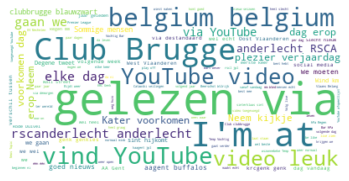

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import re, nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
nltk.download('stopwords')

stopwords_du = set(stopwords.words('dutch'))

my_cloud = WordCloud(background_color='white', stopwords=stopwords_du).generate(' '.join(df_annotations['text_clean']))
plt.imshow(my_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
